![example](images/director_shot.jpeg)

# Microsoft Studios Movie Analysis

**Authors:** Kyunghwan William Kim


## Overview

Microsoft is planning to create a new movie studio and has requested actionable insights of what types of films are currently doing the best at the box office. This project analyzes the factors of a successful movie. The datasets consists of multiples websites such as "Box Office Mojo", "IMDB", and etc. In order to determine the most successful movie, various factors were analyzed including "production budget", "gross revenue", "genres" and 'studios". The methods that were required to perform the exploratory data analysis (EDA) in the movie industry included: storing and cleaning the data, and visualization of data using seaborn and matplotib. The description of the methodology and the recommendations in order to be successful as a movie studio are written below. 

## Business Problem

Microsoft has announced that they will create a new movie studio however, they have no prior knowledge of the movie industry, and they need help so that their movie studio can be successful. 

The goal is to provide Microsoft with a data-driven analysis of the movie industry and determine the factors of a successful movie. 
The following factors of a successful movie were investigated:

***
	1. What are the most profitable movies and how are the budgets related?
	2. Which movie studios are some of the biggest competitors?
	3. Which movie genres are the most popular in the movie industry
	4. Which directors tend to add the most value?

 ***

## Data Understanding

The data was imported from a wide range of movie related data in .csv files from Box Office Mojo, IMDB, and The Numbers

In order to target the relevant data, each data-frame had to be analyzed and cleaned to locate the necessary fields including movie ratings, gross and net revenue, directors, and studios. 

***
The .csv files imported are the following:
1. imdb_title_crew :each record represents a director and a writer
2. imdb_title_ratings: each record represents the rating and number of votes 
3. imdb_name_basics: each record represents a directors full primary name
4. imdb_title_principals: needed to join data frames together
5. imdb_title_basics: each record represents a movie title and related genres
6. tn_movie_budgets: each record represents a movie's worldwide gross and production budget
***

## Data Preparation

After reviewing the data scheme and the related fields within the given data frames. The following fields were selected for analysis, including but not limited to movie title, gross and net revenue, genres, studios, and directors. 

All data types for the file labeled 'tn_movie_budgets" were objects and the fields were changed to their relevant types, such as worldwide gross and production budget were changed to integers so that a statistical analysis could be conducted. Additionally a new variable was created to calculated the net profit which is worldwide gross subtracted by the production budget. One additional filter used were removing movies that had a zero domestic gross and net profit. The analysis was to find most profitable movies so movies that made $0 in revenue were eliminated. 

Records with missing studios, genres, and directors were removed from the analysis. Additionally the top two profitable movies Avatar and Titanic were removed due to their extremely high worldwide gross revenue. 

##### Loading the Data with Pandas

Importing data and libraries to prepare for analysis

In [1]:
# Import standard packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

%matplotlib inline

In [2]:
# Here you run your code to explore the data
#importing data using glob
import os
from glob import glob
import pandas as pd

csv_files = glob("data/zippedData/*.csv.gz")
csv_files

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")  #cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)

    csv_files_dict[filename_cleaned] = filename_df

In [3]:
csv_files

['data/zippedData\\bom.movie_gross.csv.gz',
 'data/zippedData\\imdb.name.basics.csv.gz',
 'data/zippedData\\imdb.title.akas.csv.gz',
 'data/zippedData\\imdb.title.basics.csv.gz',
 'data/zippedData\\imdb.title.crew.csv.gz',
 'data/zippedData\\imdb.title.principals.csv.gz',
 'data/zippedData\\imdb.title.ratings.csv.gz',
 'data/zippedData\\tmdb.movies.csv.gz',
 'data/zippedData\\tn.movie_budgets.csv.gz']

In [4]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

### Question 1:
##### What are the most profitable movies and how much were the production budgets?

##### Gross & Net Revenue

The website "The Numbers" has movie revenue data. However the data had to be cleaned and transformed in order to perform a statistical analysis.

In [5]:
#import 'tn_movie_budgets' 
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']

In [6]:
tn_movie_budgets_df.shape

(5782, 5)

In [7]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


Noticed that no null values exists in the data set, however all data types are objects.

In [8]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### Important observations: 
***
* Release dates are all object type -> change to datetime
* Budget costs are all object type -> change to integers

In [9]:
#change release_date to datetime
tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])

In [10]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
# change worldwide_gross to integers
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',','')
tn_movie_budgets_df['worldwide_gross']

id
1     $2776345279
2     $1045663875
3      $149762350
4     $1403013963
5     $1316721747
         ...     
78             $0
79        $240495
80          $1338
81             $0
82        $181041
Name: worldwide_gross, Length: 5782, dtype: object

In [12]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.strip('$')
tn_movie_budgets_df['worldwide_gross']

id
1     2776345279
2     1045663875
3      149762350
4     1403013963
5     1316721747
         ...    
78             0
79        240495
80          1338
81             0
82        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [13]:
tn_movie_budgets_df['worldwide_gross'] = pd.to_numeric(tn_movie_budgets_df['worldwide_gross'])
tn_movie_budgets_df['worldwide_gross']

id
1     2776345279
2     1045663875
3      149762350
4     1403013963
5     1316721747
         ...    
78             0
79        240495
80          1338
81             0
82        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [14]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',','')
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.strip('$')
tn_movie_budgets_df['production_budget'] = pd.to_numeric(tn_movie_budgets_df['production_budget'])
tn_movie_budgets_df['production_budget']

id
1     425000000
2     410600000
3     350000000
4     330600000
5     317000000
        ...    
78         7000
79         6000
80         5000
81         1400
82         1100
Name: production_budget, Length: 5782, dtype: int64

In [15]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',','')
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.strip('$')
tn_movie_budgets_df['domestic_gross'] = pd.to_numeric(tn_movie_budgets_df['domestic_gross'])
tn_movie_budgets_df['domestic_gross']

id
1     760507625
2     241063875
3      42762350
4     459005868
5     620181382
        ...    
78            0
79        48482
80         1338
81            0
82       181041
Name: domestic_gross, Length: 5782, dtype: int64

##### Analysis is for profitable movies, so let's remove movies that has $0 gross revenue.

In [16]:
#remove movies that had a $0 domestic gross.
tn_movie_budgets_df = tn_movie_budgets_df[tn_movie_budgets_df['domestic_gross'] != 0]

In [17]:
tn_movie_budgets_df.shape

(5234, 5)

##### Create new column that calculates net profit. Net Profit equals Worldwide Gross subtracted by Production Budget.

In [18]:
#calculate net profit
tn_movie_budgets_df['worldwide_net'] = tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']

C:\Users\ZAPTOS\AppData\Local\Temp/ipykernel_13768/3204409985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_movie_budgets_df['worldwide_net'] = tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']


In [19]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_net
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [20]:
tn_movie_budgets_df[tn_movie_budgets_df['worldwide_net'] < 0].sample(5, random_state=1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_net
id,,,,,,
66,2009-11-20,The Missing Person,2000000,17896,17896,-1982104
94,2000-12-22,Thirteen Days,80000000,34566746,66554547,-13445453
81,2012-06-01,Hardflip,1000000,96734,96734,-903266
74,1991-08-30,Beastmaster 2: Through the Portal of Time,6000000,773490,773490,-5226510
85,2003-02-28,Spider,10000000,1641788,1641788,-8358212


In [21]:
#remove movies that had a negative worldwide net.
tn_movie_budgets_df = tn_movie_budgets_df[tn_movie_budgets_df['worldwide_net'] > 0]

In [22]:
tn_movie_budgets_df.shape

(3611, 6)

In [23]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_net
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220


In [24]:
# change index
tn_movie_budgets_df.set_index('movie', inplace=True)

In [25]:
# drop 'domestic_gross' column
tn_movie_budgets_df = tn_movie_budgets_df.drop(['domestic_gross'], axis=1)

In [26]:
tn_movie_budgets_df.shape

(3611, 4)

In [27]:
#find missing values
tn_movie_budgets_df.isna().sum()

release_date         0
production_budget    0
worldwide_gross      0
worldwide_net        0
dtype: int64

##### Lets find the highest worldwide gross films

In [28]:
#sort based highest worldwide gross movies
tn_movie_budgets_df = tn_movie_budgets_df.sort_values(by='worldwide_gross', ascending=False)

In [29]:
tn_movie_budgets_df.head(10)

,release_date,production_budget,worldwide_gross,worldwide_net
movie,,,,
Avatar,2009-12-18,425000000,2776345279,2351345279
Titanic,1997-12-19,200000000,2208208395,2008208395
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,2053311220,1747311220
Avengers: Infinity War,2018-04-27,300000000,2048134200,1748134200
Jurassic World,2015-06-12,215000000,1648854864,1433854864
Furious 7,2015-04-03,190000000,1518722794,1328722794
The Avengers,2012-05-04,225000000,1517935897,1292935897
Avengers: Age of Ultron,2015-05-01,330600000,1403013963,1072413963
Black Panther,2018-02-16,200000000,1348258224,1148258224


###### Lets remove the outliers, Avatar & Titanic are the top 2 worldwide grossing films which made over $2 Biliion in profits and are eliminated from the data set. 

In [30]:
# remove top two rows
tn_movie_budgets_df = tn_movie_budgets_df.iloc[2: , :]
tn_movie_budgets_df.head(10)

,release_date,production_budget,worldwide_gross,worldwide_net
movie,,,,
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,2053311220,1747311220
Avengers: Infinity War,2018-04-27,300000000,2048134200,1748134200
Jurassic World,2015-06-12,215000000,1648854864,1433854864
Furious 7,2015-04-03,190000000,1518722794,1328722794
The Avengers,2012-05-04,225000000,1517935897,1292935897
Avengers: Age of Ultron,2015-05-01,330600000,1403013963,1072413963
Black Panther,2018-02-16,200000000,1348258224,1148258224
Harry Potter and the Deathly Hallows: Part II,2011-07-15,125000000,1341693157,1216693157
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,1316721747,999721747


In [31]:
ww_gross_top10_df = tn_movie_budgets_df.head(10)
ww_gross_top10_df

,release_date,production_budget,worldwide_gross,worldwide_net
movie,,,,
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,2053311220,1747311220
Avengers: Infinity War,2018-04-27,300000000,2048134200,1748134200
Jurassic World,2015-06-12,215000000,1648854864,1433854864
Furious 7,2015-04-03,190000000,1518722794,1328722794
The Avengers,2012-05-04,225000000,1517935897,1292935897
Avengers: Age of Ultron,2015-05-01,330600000,1403013963,1072413963
Black Panther,2018-02-16,200000000,1348258224,1148258224
Harry Potter and the Deathly Hallows: Part II,2011-07-15,125000000,1341693157,1216693157
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,1316721747,999721747


In [32]:
ww_gross_top10_df = ww_gross_top10_df.reset_index()

In [33]:
#new dataframe movies sorted by highest net profit
ww_net_top10_df = tn_movie_budgets_df.sort_values(by='worldwide_net', ascending=False).head(10)
ww_net_top10_df

,release_date,production_budget,worldwide_gross,worldwide_net
movie,,,,
Avengers: Infinity War,2018-04-27,300000000,2048134200,1748134200
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,2053311220,1747311220
Jurassic World,2015-06-12,215000000,1648854864,1433854864
Furious 7,2015-04-03,190000000,1518722794,1328722794
The Avengers,2012-05-04,225000000,1517935897,1292935897
Harry Potter and the Deathly Hallows: Part II,2011-07-15,125000000,1341693157,1216693157
Black Panther,2018-02-16,200000000,1348258224,1148258224
Jurassic World: Fallen Kingdom,2018-06-22,170000000,1305772799,1135772799
Frozen,2013-11-22,150000000,1272469910,1122469910


###### now the most profitable movies

In [34]:
ww_net_top10_df = ww_net_top10_df.reset_index()

In [35]:
ww_net_top10_df

,movie,release_date,production_budget,worldwide_gross,worldwide_net
0,Avengers: Infinity War,2018-04-27,300000000,2048134200,1748134200
1,Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,2053311220,1747311220
2,Jurassic World,2015-06-12,215000000,1648854864,1433854864
3,Furious 7,2015-04-03,190000000,1518722794,1328722794
4,The Avengers,2012-05-04,225000000,1517935897,1292935897
5,Harry Potter and the Deathly Hallows: Part II,2011-07-15,125000000,1341693157,1216693157
6,Black Panther,2018-02-16,200000000,1348258224,1148258224
7,Jurassic World: Fallen Kingdom,2018-06-22,170000000,1305772799,1135772799
8,Frozen,2013-11-22,150000000,1272469910,1122469910
9,Beauty and the Beast,2017-03-17,160000000,1259199706,1099199706


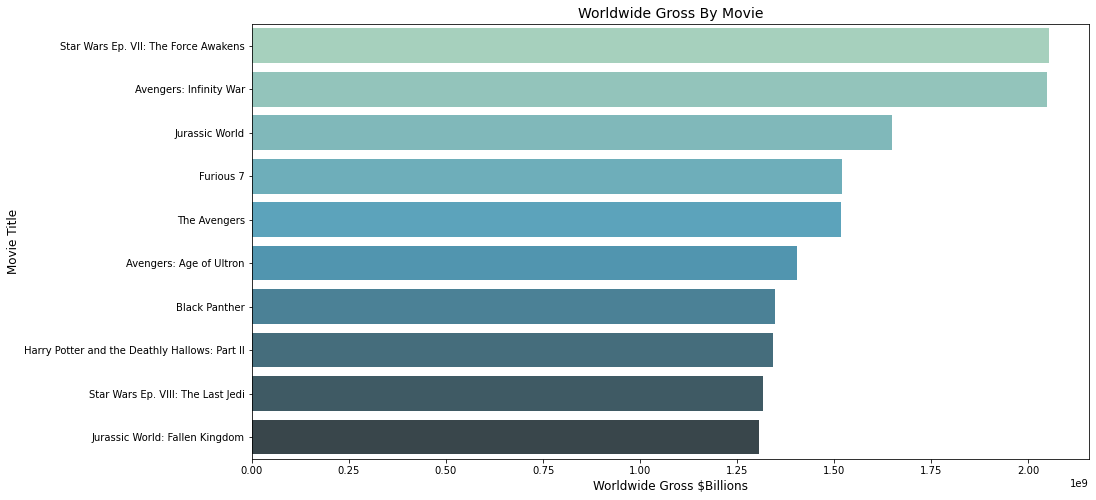

In [36]:
plt.figure(figsize=(15,8))
ax30 = sns.barplot(x=ww_gross_top10_df['worldwide_gross'], y=ww_gross_top10_df['movie'], palette='GnBu_d')
plt.xlabel('Worldwide Gross $Billions', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Worldwide Gross By Movie', fontsize=14);

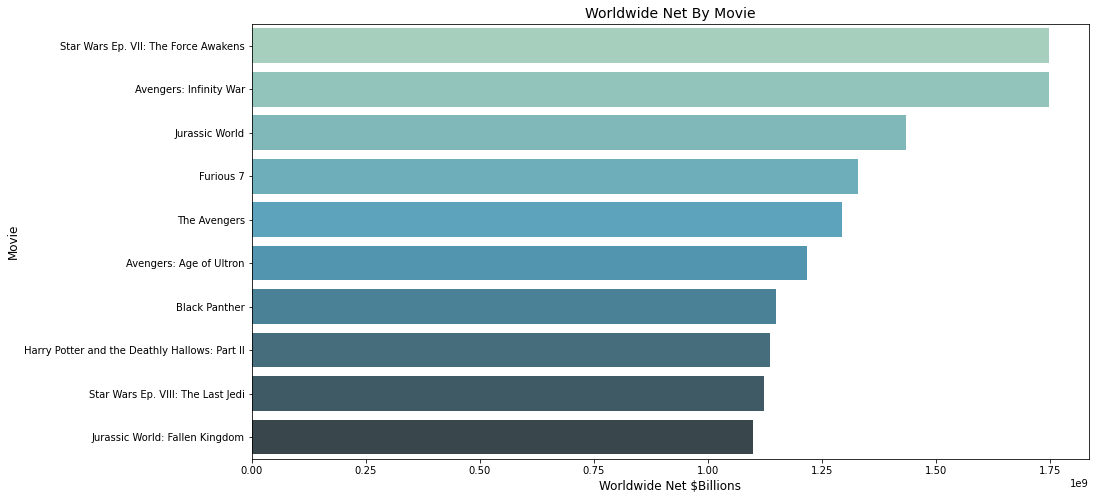

In [37]:
plt.figure(figsize=(15,8))
ax31 = sns.barplot(x=ww_net_top10_df['worldwide_net'], y=ww_gross_top10_df['movie'], palette='GnBu_d')
plt.xlabel('Worldwide Net $Billions', fontsize=12)
plt.ylabel('Movie', fontsize=12)
plt.title('Worldwide Net By Movie', fontsize=14);

##### The top grossed and the top net profit movies are not equal. Lets further examine.

Examine the overall trend of production budget versus worldwide gross to see if there is any correlation.

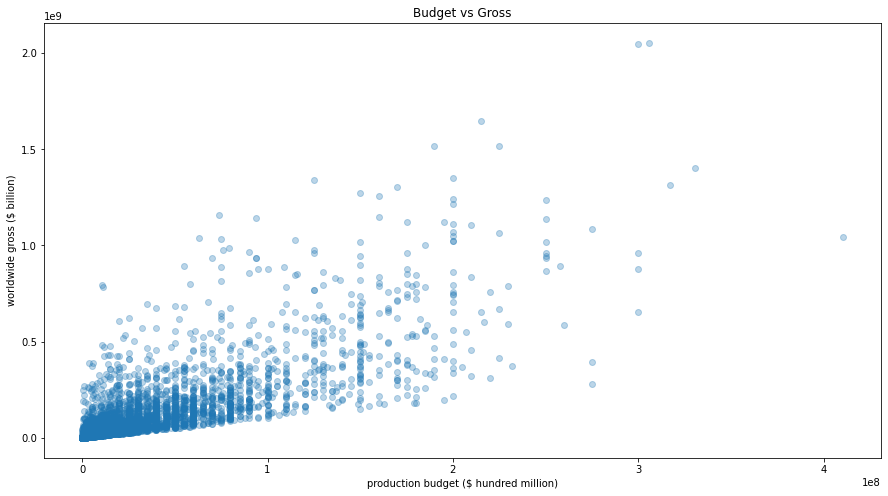

In [38]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.scatter(
    x=tn_movie_budgets_df["production_budget"],
    y=tn_movie_budgets_df["worldwide_gross"],
    alpha=0.3
)

ax.set_xlabel("production budget ($ hundred million)")
ax.set_ylabel("worldwide gross ($ billion)")
ax.set_title("Budget vs Gross");
plt.savefig('fig01_Budget_Gross_Var');

The positive trend line is leading us to believe that higher production budget equals to higher gross sales. However one plot is not enough to make that conclusion. 

The plot below shots production budget versus net profit. Which is showing a trend line that is negative meaning that spending too much money does risk of declining the profit margin.

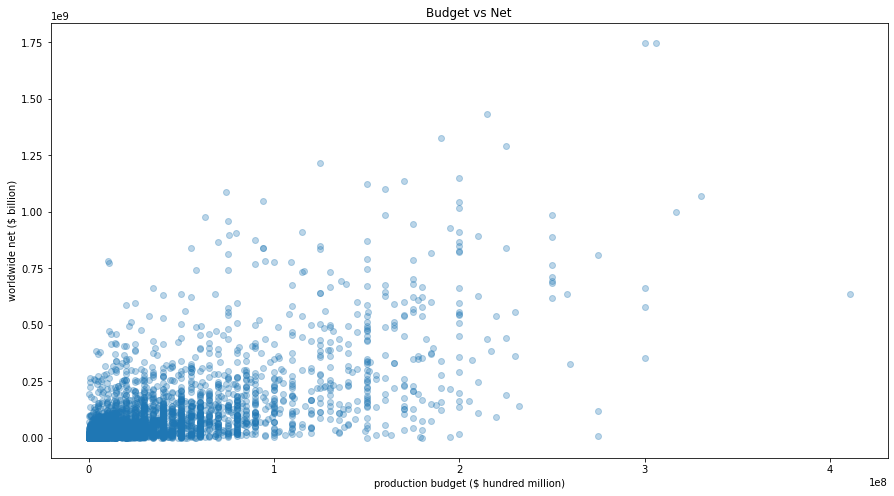

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.scatter(
    x=tn_movie_budgets_df["production_budget"],
    y=tn_movie_budgets_df["worldwide_net"],
    alpha=0.3
)

ax.set_xlabel("production budget ($ hundred million)")
ax.set_ylabel("worldwide net ($ billion)")
ax.set_title("Budget vs Net");

##### the trend line for the worldwide net is not as positive as the trend line as the worldwide gross. Meaning that pouring more money does not always correlate to higher box office numbers.

In [40]:
tn_movie_df = tn_movie_budgets_df.sort_values(by='worldwide_net', ascending=False)

In [41]:
tn_movie_df.head()

,release_date,production_budget,worldwide_gross,worldwide_net
movie,,,,
Avengers: Infinity War,2018-04-27,300000000,2048134200,1748134200
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,2053311220,1747311220
Jurassic World,2015-06-12,215000000,1648854864,1433854864
Furious 7,2015-04-03,190000000,1518722794,1328722794
The Avengers,2012-05-04,225000000,1517935897,1292935897


So what is the recommendation? Lets look into the most profitable top 25 movies and use the mean as a target of success

In [42]:
tn_movie_df1 = tn_movie_df.head(25)

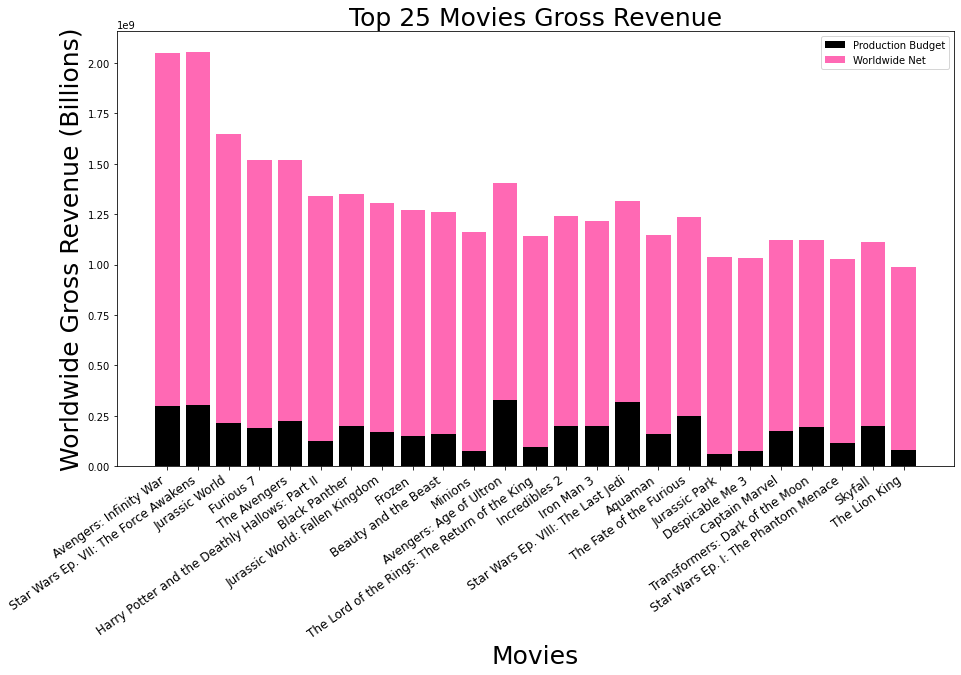

In [43]:
plt.figure(figsize=(15,8))

movies = tn_movie_df1.index
budget_gross = tn_movie_df1.production_budget
ww_net = tn_movie_df1.worldwide_net
ww_gross = tn_movie_df1.worldwide_gross

plt.bar(range(len(movies)), budget_gross, color='black')
plt.bar(range(len(movies)), ww_net, color='hotpink', bottom=budget_gross)
plt.title('Top 25 Movies Gross Revenue', fontsize=25)
plt.xlabel('Movies', fontsize=25)
plt.ylabel('Worldwide Gross Revenue (Billions)', fontsize=25)
plt.xticks(range(len(movies)), movies, rotation=35, horizontalalignment='right', fontsize=12)

plt.legend(['Production Budget', 'Worldwide Net'])
plt.savefig('fig02_Top_25_Gross')
plt.show();

In [44]:
tn_movie_df1.mean()

C:\Users\ZAPTOS\AppData\Local\Temp/ipykernel_13768/2454665950.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  tn_movie_df1.mean()


production_budget    1.827560e+08
worldwide_gross      1.304786e+09
worldwide_net        1.122030e+09
dtype: float64

In [45]:
tn_movie_df1.head()

,release_date,production_budget,worldwide_gross,worldwide_net
movie,,,,
Avengers: Infinity War,2018-04-27,300000000,2048134200,1748134200
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,2053311220,1747311220
Jurassic World,2015-06-12,215000000,1648854864,1433854864
Furious 7,2015-04-03,190000000,1518722794,1328722794
The Avengers,2012-05-04,225000000,1517935897,1292935897


##### Question 1 Conclusion: 

Question #1: What are the most profitable movies and how are the production budgets related?

Recommendation #1: We discovered that the highest grossed movies are not equal to the movies with the most profits. Meaning that pouring money into a movie does not guarantee a success in the box office. Instead, the top 25 most profitable movies were investigated, and found that the mean production budget is $182,756,000.00 and is the recommended production budget for a successful movie

Top 25 Profitable Movies average values are

    1. production_budget   $ 182,756,000.00
2. worldwide_gross   $ 1,304,786,000.00
    3. worldwide_net     $ 1,122,030,000.00


### Question 2:
##### Which movie studio made the most profitable movies?

Lets find our biggest competitors

In [46]:
bom_movie_gross_df = csv_files_dict['bom_movie_gross_gz']
bom_movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [47]:
bom_movie_gross_df.shape

(3387, 4)

In [48]:
bom_movie_gross_df = bom_movie_gross_df.drop(['domestic_gross', 'foreign_gross', 'year'], axis=1)
bom_movie_gross_df.head()

,studio
title,
Toy Story 3,BV
Alice in Wonderland (2010),BV
Harry Potter and the Deathly Hallows Part 1,WB
Inception,WB
Shrek Forever After,P/DW


In [49]:
# drop movies with missing studios
bom_movie_gross_df = bom_movie_gross_df.dropna()

In [50]:
bom_movie_gross_df.shape

(3382, 1)

In [51]:
# join two dataframes together
budget_studio_df = tn_movie_budgets_df.join(bom_movie_gross_df, how='inner')
budget_studio_df.head()

,release_date,production_budget,worldwide_gross,worldwide_net,studio
10 Cloverfield Lane,2016-03-11,5000000,108286422,103286422,Par.
12 Strong,2018-01-19,35000000,71118378,36118378,WB
12 Years a Slave,2013-10-18,20000000,181025343,161025343,FoxS
127 Hours,2010-11-05,18000000,60217171,42217171,FoxS
13 Hours: The Secret Soldiers of Benghazi,2016-01-15,50000000,69411370,19411370,Par.


In [52]:
budget_studio_df.shape

(978, 5)

In [53]:
budget_studio_df.isna().sum()

release_date         0
production_budget    0
worldwide_gross      0
worldwide_net        0
studio               0
dtype: int64

In [54]:
budget_studio_df.dropna()

,release_date,production_budget,worldwide_gross,worldwide_net,studio
10 Cloverfield Lane,2016-03-11,5000000,108286422,103286422,Par.
12 Strong,2018-01-19,35000000,71118378,36118378,WB
12 Years a Slave,2013-10-18,20000000,181025343,161025343,FoxS
127 Hours,2010-11-05,18000000,60217171,42217171,FoxS
13 Hours: The Secret Soldiers of Benghazi,2016-01-15,50000000,69411370,19411370,Par.
...,...,...,...,...,...
Zookeeper,2011-07-08,80000000,170805525,90805525,Sony
Zoolander 2,2016-02-12,50000000,55348693,5348693,Par.
Zootopia,2016-03-04,150000000,1019429616,869429616,BV
[Rec] 2,2010-07-09,5600000,18527766,12927766,Magn.


In [55]:
# top 10 profitable movies with studios
budget_studio_df1 = budget_studio_df.sort_values(by='worldwide_net', ascending=False).head(10)
budget_studio_df1

,release_date,production_budget,worldwide_gross,worldwide_net,studio
Avengers: Infinity War,2018-04-27,300000000,2048134200,1748134200,BV
Jurassic World,2015-06-12,215000000,1648854864,1433854864,Uni.
Furious 7,2015-04-03,190000000,1518722794,1328722794,Uni.
Black Panther,2018-02-16,200000000,1348258224,1148258224,BV
Jurassic World: Fallen Kingdom,2018-06-22,170000000,1305772799,1135772799,Uni.
Frozen,2013-11-22,150000000,1272469910,1122469910,BV
Minions,2015-07-10,74000000,1160336173,1086336173,Uni.
Avengers: Age of Ultron,2015-05-01,330600000,1403013963,1072413963,BV
Incredibles 2,2018-06-15,200000000,1242520711,1042520711,BV
Iron Man 3,2013-05-03,200000000,1215392272,1015392272,BV


##### Buena Vista and Universal have been dominating the box office

In [56]:
# Studios that made the most movies
top5_studio = budget_studio_df.studio.value_counts().head(5)
top5_studio

Fox     102
Uni.     99
WB       89
Sony     69
Par.     66
Name: studio, dtype: int64

In [57]:
budget_studio_df['studio'].value_counts()

Fox         102
Uni.         99
WB           89
Sony         69
Par.         66
           ... 
Kino          1
Studio 8      1
PNT           1
GrtIndia      1
Mira.         1
Name: studio, Length: 66, dtype: int64

In [58]:
budget_studio_df.groupby(['studio']).sum()

,production_budget,worldwide_gross,worldwide_net
studio,,,
3D,5000000,16515203,11515203
A24,85100000,373422743,288322743
Affirm,7000000,31471492,24471492
Anch.,7500000,9778625,2278625
Annapurna,72000000,90742338,18742338
...,...,...,...
W/Dim.,172500000,593027548,420527548
WB,7627000000,21789247510,14162247510
WB (NL),2006600000,8421247281,6414647281


Sort and Aggregate the data

In [59]:
# sort and aggregate the data
budget_studio_df_agg = budget_studio_df.groupby(['studio']).agg('sum')

In [60]:
budget_studio_df_agg = budget_studio_df_agg.sort_values('worldwide_net', ascending=False).head(10)
budget_studio_df_agg

,production_budget,worldwide_gross,worldwide_net
studio,,,
BV,8898800000,32908386178,24009586178
Uni.,5439200000,26465414604,21026214604
Fox,7499500000,26637599733,19138099733
WB,7627000000,21789247510,14162247510
Sony,4894000000,17487527176,12593527176
Par.,4485000000,14252759641,9767759641
WB (NL),2006600000,8421247281,6414647281
LGF,1833287650,6824229290,4990941640
P/DW,1294000000,5057237115,3763237115


In [61]:
budget_studio_df_agg.index

Index(['BV', 'Uni.', 'Fox', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'P/DW',
       'LG/S'],
      dtype='object', name='studio')

In [62]:
font = {'family' : 'Arial', 
        'weight' : 'bold', 
        'size' : 15}

plt.rc('font', **font)

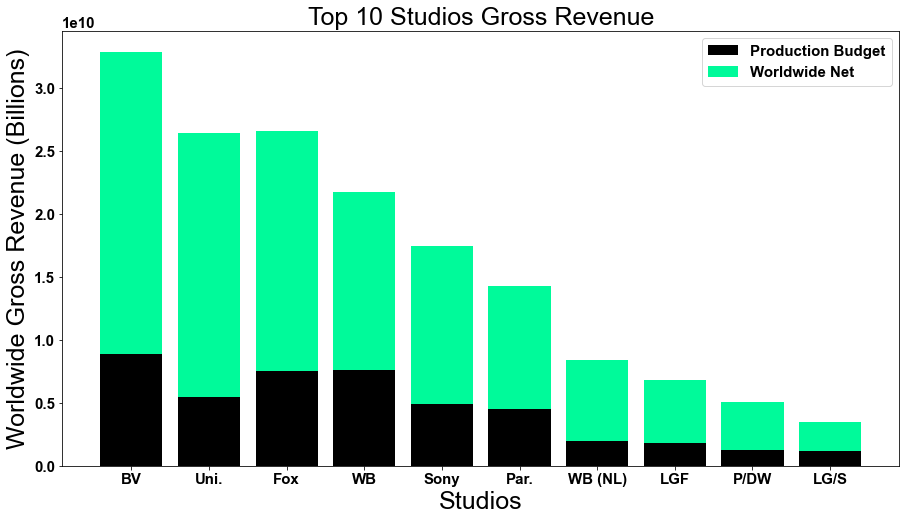

In [63]:
plt.figure(figsize=(15,8))

studios = budget_studio_df_agg.index
budget_gross = budget_studio_df_agg.production_budget
ww_net = budget_studio_df_agg.worldwide_net
ww_gross = budget_studio_df_agg.worldwide_gross

plt.bar(range(len(studios)), budget_gross, color='black')
plt.bar(range(len(studios)), ww_net, color='mediumspringgreen', bottom=budget_gross)
plt.title('Top 10 Studios Gross Revenue', fontsize=25)
plt.xlabel('Studios', fontsize=25)
plt.ylabel('Worldwide Gross Revenue (Billions)', fontsize=25)
plt.xticks(range(len(studios)), studios)

plt.legend(['Production Budget', 'Worldwide Net'])
plt.savefig('fig03_Top10_studios')
plt.show();

In [64]:
budget_studio_df_agg.describe()

,production_budget,worldwide_gross,worldwide_net
count,1.000000e+01,1.000000e+01,1.000000e+01
mean,4.515889e+09,1.633070e+10,1.181481e+10
std,2.863154e+09,1.035378e+10,7.666173e+09
min,1.181500e+09,3.463378e+09,2.281878e+09
25%,1.876616e+09,7.223484e+09,5.346868e+09
50%,4.689500e+09,1.587014e+10,1.118064e+10
75%,6.984425e+09,2.529637e+10,1.789414e+10
max,8.898800e+09,3.290839e+10,2.400959e+10


In [65]:
budget_studio_df_agg.median()

production_budget    4.689500e+09
worldwide_gross      1.587014e+10
worldwide_net        1.118064e+10
dtype: float64

In [66]:
budget_studio_df_agg.head()

,production_budget,worldwide_gross,worldwide_net
studio,,,
BV,8898800000,32908386178,24009586178
Uni.,5439200000,26465414604,21026214604
Fox,7499500000,26637599733,19138099733
WB,7627000000,21789247510,14162247510
Sony,4894000000,17487527176,12593527176


#####  Question 2 Conclusions:

Question #2: Which movie studios are some of the biggest competitors?

Recommendation #2: Similarly, the top 5 movie studios that make the most movies are the not the same as the top 5 movie studios that made the most profits. 

The top five studios that make the most movies are not the top 5 studios that make the most profit. The competition should focus on the top 5 profitable studios

##### The top 5 studios that made the most movies are in order 
1. Fox             102
2. Universal       99
3. Warner Brothers 89 
4. Sony            69
5. Paramount       66 

##### The top 5 studios that made the most profit are in order
    1. Buena Vista $23 Billion
2. Universal   $21 Billion
    3. Fox         $19 Billion
4. Warner Bros $14 Billion
    5. Sony        $12 Billion

### Question 3:
##### What are the most common and profitable genres?

##### Gross Revenue by Genre

Lets explore movie genres that made the most profit

In [67]:
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']
imdb_title_basics_df.shape

(146144, 5)

In [68]:
imdb_title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [69]:
imdb_title_basics_df = imdb_title_basics_df.drop(['start_year', 'runtime_minutes', 'original_title'], axis=1)
imdb_title_basics_df.head()

,primary_title,genres
tconst,,
tt0063540,Sunghursh,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,"Biography,Drama"
tt0069049,The Other Side of the Wind,Drama
tt0069204,Sabse Bada Sukh,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [70]:
imdb_title_basics_df.isna().sum()

primary_title       0
genres           5408
dtype: int64

In [71]:
imdb_title_basics_df = imdb_title_basics_df.dropna()

In [72]:
imdb_title_basics_df.isna().sum()

primary_title    0
genres           0
dtype: int64

In [73]:
# explode method used to seperate genres
imdb_title_basics_df_explode = imdb_title_basics_df.assign(genres=imdb_title_basics_df.genres.str.split(',')).explode('genres')

In [74]:
imdb_title_basics_df_explode.head()

,primary_title,genres
tconst,,
tt0063540,Sunghursh,Action
tt0063540,Sunghursh,Crime
tt0063540,Sunghursh,Drama
tt0066787,One Day Before the Rainy Season,Biography
tt0066787,One Day Before the Rainy Season,Drama


In [75]:
imdb_title_basics_df_explode.duplicated().value_counts()

False    223085
True       6465
dtype: int64

In [76]:
imdb_title_basics_df_explode.shape

(229550, 2)

In [77]:
imdb_title_basics_df_explode = imdb_title_basics_df_explode.drop_duplicates()

In [78]:
imdb_title_basics_df_explode.shape

(223085, 2)

In [79]:
imdb_title_basics_df_explode.head()

,primary_title,genres
tconst,,
tt0063540,Sunghursh,Action
tt0063540,Sunghursh,Crime
tt0063540,Sunghursh,Drama
tt0066787,One Day Before the Rainy Season,Biography
tt0066787,One Day Before the Rainy Season,Drama


In [80]:
imdb_title_basics_df_explode = imdb_title_basics_df_explode.drop_duplicates(subset='primary_title')

In [81]:
imdb_title_basics_df_explode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131336 entries, tt0063540 to tt9916754
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_title  131336 non-null  object
 1   genres         131336 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [82]:
imdb_title_basics_df_explode.dropna()

,primary_title,genres
tconst,,
tt0063540,Sunghursh,Action
tt0066787,One Day Before the Rainy Season,Biography
tt0069049,The Other Side of the Wind,Drama
tt0069204,Sabse Bada Sukh,Comedy
tt0100275,The Wandering Soap Opera,Comedy
...,...,...
tt9916428,The Secret of China,Adventure
tt9916538,Kuambil Lagi Hatiku,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary


In [83]:
imdb_title_basics_df_explode.head()

,primary_title,genres
tconst,,
tt0063540,Sunghursh,Action
tt0066787,One Day Before the Rainy Season,Biography
tt0069049,The Other Side of the Wind,Drama
tt0069204,Sabse Bada Sukh,Comedy
tt0100275,The Wandering Soap Opera,Comedy


In [84]:
imdb_title_basics_df_explode.shape

(131336, 2)

In [85]:
imdb_title_basics_df_explode.head()

,primary_title,genres
tconst,,
tt0063540,Sunghursh,Action
tt0066787,One Day Before the Rainy Season,Biography
tt0069049,The Other Side of the Wind,Drama
tt0069204,Sabse Bada Sukh,Comedy
tt0100275,The Wandering Soap Opera,Comedy


In [86]:
imdb_title_basics_df_explode.shape

(131336, 2)

In [87]:
imdb_title_basics_df_explode.dropna()

,primary_title,genres
tconst,,
tt0063540,Sunghursh,Action
tt0066787,One Day Before the Rainy Season,Biography
tt0069049,The Other Side of the Wind,Drama
tt0069204,Sabse Bada Sukh,Comedy
tt0100275,The Wandering Soap Opera,Comedy
...,...,...
tt9916428,The Secret of China,Adventure
tt9916538,Kuambil Lagi Hatiku,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary


In [88]:
imdb_title_basics_df_explode.reset_index()

,tconst,primary_title,genres
0,tt0063540,Sunghursh,Action
1,tt0066787,One Day Before the Rainy Season,Biography
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,Comedy
4,tt0100275,The Wandering Soap Opera,Comedy
...,...,...,...
131331,tt9916428,The Secret of China,Adventure
131332,tt9916538,Kuambil Lagi Hatiku,Drama
131333,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
131334,tt9916706,Dankyavar Danka,Comedy


In [89]:
#Do a count of all movies grouped by genre.
movie_by_genre = imdb_title_basics_df_explode.groupby('genres', as_index=False)['primary_title'].count().sort_values(by='primary_title', ascending=False)

In [90]:
movie_by_genre = movie_by_genre.head(10)

In [91]:
movie_by_genre

,genres,primary_title
7,Documentary,39816
8,Drama,28226
5,Comedy,20389
0,Action,9541
4,Biography,7656
13,Horror,6039
2,Adventure,4502
6,Crime,3540
24,Thriller,2659
3,Animation,1760


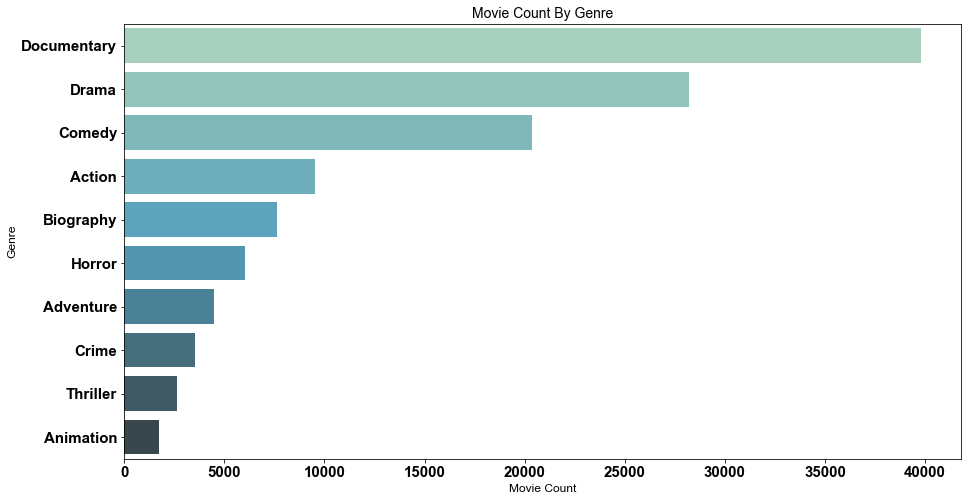

In [92]:
#Plot the above findings.
plt.figure(figsize=(15,8))
ax3 = sns.barplot(x=movie_by_genre['primary_title'], y=movie_by_genre['genres'], palette='GnBu_d')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14)
plt.savefig('fig04_CountGenre');

##### We can see that that the top 5 genres produced are:
1. Documentary
2. Drama
3. Comedy
4. Action
5. Biography

We can see that documentary, drama and comedy dominate the quantity of movie genres but do popular genres make the most profit?

In [93]:
imdb_title_basics_df_explode.head()

,primary_title,genres
tconst,,
tt0063540,Sunghursh,Action
tt0066787,One Day Before the Rainy Season,Biography
tt0069049,The Other Side of the Wind,Drama
tt0069204,Sabse Bada Sukh,Comedy
tt0100275,The Wandering Soap Opera,Comedy


In [94]:
imdb_title_basics_df_explode = imdb_title_basics_df_explode.reset_index()

In [95]:
imdb_title_basics_df_explode.head()

,tconst,primary_title,genres
0,tt0063540,Sunghursh,Action
1,tt0066787,One Day Before the Rainy Season,Biography
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,Comedy
4,tt0100275,The Wandering Soap Opera,Comedy


In [96]:
imdb_title_basics_df_explode = imdb_title_basics_df_explode.set_index('primary_title')

In [97]:
imdb_title_basics_df_explode.head()

,tconst,genres
primary_title,,
Sunghursh,tt0063540,Action
One Day Before the Rainy Season,tt0066787,Biography
The Other Side of the Wind,tt0069049,Drama
Sabse Bada Sukh,tt0069204,Comedy
The Wandering Soap Opera,tt0100275,Comedy


In [98]:
budget_studio_df.head()

,release_date,production_budget,worldwide_gross,worldwide_net,studio
10 Cloverfield Lane,2016-03-11,5000000,108286422,103286422,Par.
12 Strong,2018-01-19,35000000,71118378,36118378,WB
12 Years a Slave,2013-10-18,20000000,181025343,161025343,FoxS
127 Hours,2010-11-05,18000000,60217171,42217171,FoxS
13 Hours: The Secret Soldiers of Benghazi,2016-01-15,50000000,69411370,19411370,Par.


In [99]:
budget_genres_df = imdb_title_basics_df_explode.join(budget_studio_df, how='inner')
budget_genres_df.head()

,tconst,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio
10 Cloverfield Lane,tt1179933,Drama,2016-03-11,5000000,108286422,103286422,Par.
12 Strong,tt1413492,Action,2018-01-19,35000000,71118378,36118378,WB
12 Years a Slave,tt2024544,Biography,2013-10-18,20000000,181025343,161025343,FoxS
127 Hours,tt1542344,Adventure,2010-11-05,18000000,60217171,42217171,FoxS
2 Guns,tt1272878,Action,2013-08-02,61000000,132493015,71493015,Uni.


In [100]:
budget_genres_df.shape

(922, 7)

In [101]:
budget_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 10 Cloverfield Lane to Zootopia
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             922 non-null    object        
 1   genres             922 non-null    object        
 2   release_date       922 non-null    datetime64[ns]
 3   production_budget  922 non-null    int64         
 4   worldwide_gross    922 non-null    int64         
 5   worldwide_net      922 non-null    int64         
 6   studio             922 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 57.6+ KB


In [102]:
budget_genres_df = budget_genres_df.dropna()

In [103]:
budget_genres_df.shape

(922, 7)

In [104]:
top10_genres = budget_genres_df.genres.value_counts().head(10)

In [105]:
top10_genres

Action         280
Comedy         194
Drama          152
Adventure      115
Biography       69
Horror          49
Crime           37
Documentary     10
Animation        7
Thriller         3
Name: genres, dtype: int64

In [106]:
budget_genres_df.groupby(['genres']).sum()

,production_budget,worldwide_gross,worldwide_net
genres,,,
Action,26653000000,91416243861,64763243861
Adventure,10459400000,38431466605,27972066605
Animation,521000000,2506321855,1985321855
Biography,1725170000,7452572524,5727402524
Comedy,5188470000,18253299913,13064829913
Crime,1165000000,3769878307,2604878307
Documentary,168000000,911781493,743781493
Drama,3232147650,11858474641,8626326991
Fantasy,67000000,130804869,63804869


In [107]:
budget_genres_df_agg = budget_genres_df.groupby(['genres']).sum()

In [108]:
budget_genres_df_agg = budget_genres_df_agg.sort_values('worldwide_gross', ascending=False).head(10)
budget_genres_df_agg

,production_budget,worldwide_gross,worldwide_net
genres,,,
Action,26653000000,91416243861,64763243861
Adventure,10459400000,38431466605,27972066605
Comedy,5188470000,18253299913,13064829913
Drama,3232147650,11858474641,8626326991
Biography,1725170000,7452572524,5727402524
Horror,600100000,5170494544,4570394544
Crime,1165000000,3769878307,2604878307
Animation,521000000,2506321855,1985321855
Documentary,168000000,911781493,743781493


In [109]:
budget_genres_df_agg.index

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Biography', 'Horror',
       'Crime', 'Animation', 'Documentary', 'Mystery'],
      dtype='object', name='genres')

In [110]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

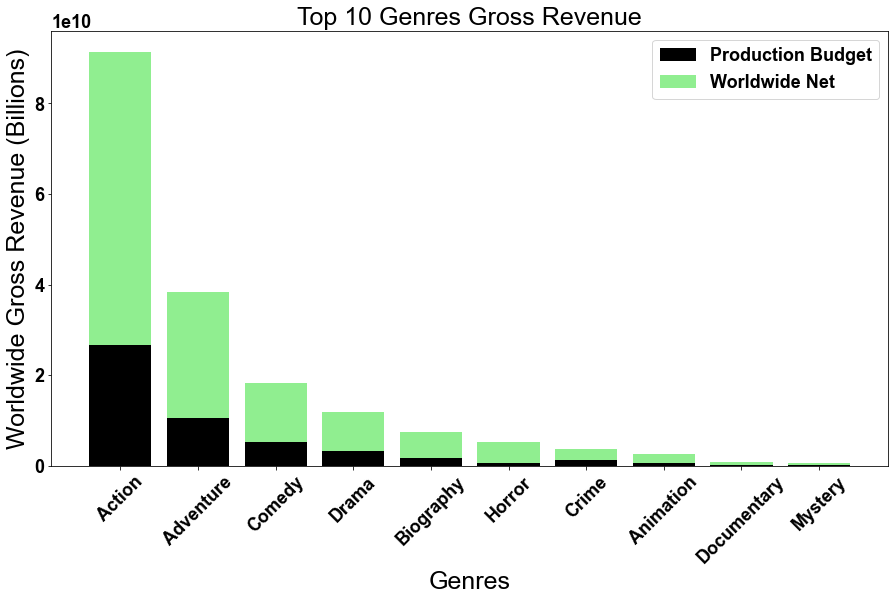

In [111]:
plt.figure(figsize=(15,8))

genres = budget_genres_df_agg.index
budget_gross = budget_genres_df_agg.production_budget
ww_net = budget_genres_df_agg.worldwide_net
ww_gross = budget_genres_df_agg.worldwide_gross

plt.bar(range(len(genres)), budget_gross, color='black')
plt.bar(range(len(genres)), ww_net, color='lightgreen', bottom=budget_gross)
plt.title('Top 10 Genres Gross Revenue', fontsize=25)
plt.xlabel('Genres', fontsize=25)
plt.ylabel('Worldwide Gross Revenue (Billions)', fontsize=25)
plt.xticks(range(len(genres)), genres)
plt.tick_params(axis="x", labelrotation=45)

plt.legend(['Production Budget', 'Worldwide Net'])
plt.savefig('fig05_Top10_genres')
plt.show();

In [112]:
budget_genres_df_agg.mean()

production_budget    4.986929e+09
worldwide_gross      1.804835e+10
worldwide_net        1.306142e+10
dtype: float64

In [113]:
budget_genres_df_agg.describe()

,production_budget,worldwide_gross,worldwide_net
count,1.000000e+01,1.000000e+01,1.000000e+01
mean,4.986929e+09,1.804835e+10,1.306142e+10
std,8.256121e+09,2.819454e+10,1.994740e+10
min,1.570000e+08,7.129994e+08,5.559994e+08
25%,5.407750e+08,2.822211e+09,2.140211e+09
50%,1.445085e+09,6.311534e+09,5.148899e+09
75%,4.699389e+09,1.665459e+10,1.195520e+10
max,2.665300e+10,9.141624e+10,6.476324e+10


##### Question 3 Conclusions:

Question #3: Which movie genres are the most popular in the movie industry

Recommendation #3: Even though the top 3 movies genres produced are Documentary, Drama, and Comedy. When profit and gross revenue is calculated, the top 3 movie genres changes significantly.  The top 3 movie genres that produce the most revenues are Action, Adventure, and Comedy. Here the movie genre Action is on top and the worldwide gross $ is double the amount of Adventure which comes in second.

##### The top 5 movie profitable genres are
1. Action
2. Adventure
3. Comedy
4. Drama
5. Biography


### Question 4: 

Which directors tend to add the most value?
Lets locate the top directors

In [114]:
budget_genres_df.head()

,tconst,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio
10 Cloverfield Lane,tt1179933,Drama,2016-03-11,5000000,108286422,103286422,Par.
12 Strong,tt1413492,Action,2018-01-19,35000000,71118378,36118378,WB
12 Years a Slave,tt2024544,Biography,2013-10-18,20000000,181025343,161025343,FoxS
127 Hours,tt1542344,Adventure,2010-11-05,18000000,60217171,42217171,FoxS
2 Guns,tt1272878,Action,2013-08-02,61000000,132493015,71493015,Uni.


In [115]:
budget_genres_df = budget_genres_df.reset_index()

In [116]:
budget_genres_df.head()

,index,tconst,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio
0,10 Cloverfield Lane,tt1179933,Drama,2016-03-11,5000000,108286422,103286422,Par.
1,12 Strong,tt1413492,Action,2018-01-19,35000000,71118378,36118378,WB
2,12 Years a Slave,tt2024544,Biography,2013-10-18,20000000,181025343,161025343,FoxS
3,127 Hours,tt1542344,Adventure,2010-11-05,18000000,60217171,42217171,FoxS
4,2 Guns,tt1272878,Action,2013-08-02,61000000,132493015,71493015,Uni.


In [117]:
budget_genres_df = budget_genres_df.set_index('tconst')
budget_genres_df.head()

,index,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio
tconst,,,,,,,
tt1179933,10 Cloverfield Lane,Drama,2016-03-11,5000000,108286422,103286422,Par.
tt1413492,12 Strong,Action,2018-01-19,35000000,71118378,36118378,WB
tt2024544,12 Years a Slave,Biography,2013-10-18,20000000,181025343,161025343,FoxS
tt1542344,127 Hours,Adventure,2010-11-05,18000000,60217171,42217171,FoxS
tt1272878,2 Guns,Action,2013-08-02,61000000,132493015,71493015,Uni.


In [118]:
imdb_title_crew_df = csv_files_dict['imdb_title_crew_gz']
imdb_title_crew_df.head()

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [119]:
imdb_title_crew_df.shape

(146144, 2)

In [120]:
imdb_title_principals_df = csv_files_dict['imdb_title_principals_gz']
imdb_title_principals_df.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [121]:
imdb_title_principals_df.shape

(1028186, 5)

In [122]:
imdb_principals_crew_df = imdb_title_principals_df.join(imdb_title_crew_df, how='inner')
imdb_principals_crew_df.head()

,ordering,nconst,category,job,characters,directors,writers
tconst,,,,,,,
tt0063540,10,nm0006210,composer,NaN,NaN,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,3,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,4,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"


In [123]:
imdb_principals_crew_df = imdb_principals_crew_df.drop(['category', 'job', 'characters'], axis =1)
imdb_principals_crew_df.head(2)

,ordering,nconst,directors,writers
tconst,,,,
tt0063540,10,nm0006210,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,1,nm0474801,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"


In [124]:
imdb_principals_crew_df = imdb_principals_crew_df.drop(['directors', 'writers', 'ordering'], axis=1)

In [125]:
budget_crew_df = budget_genres_df.join(imdb_principals_crew_df, how='inner')
budget_crew_df.shape

(9118, 8)

In [126]:
budget_crew_df.head()

,index,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio,nconst
tconst,,,,,,,,
tt0359950,The Secret Life of Walter Mitty,Adventure,2013-12-25,91000000,187861183,96861183,Fox,nm0788640
tt0359950,The Secret Life of Walter Mitty,Adventure,2013-12-25,91000000,187861183,96861183,Fox,nm0001774
tt0359950,The Secret Life of Walter Mitty,Adventure,2013-12-25,91000000,187861183,96861183,Fox,nm1325419
tt0359950,The Secret Life of Walter Mitty,Adventure,2013-12-25,91000000,187861183,96861183,Fox,nm1789985
tt0359950,The Secret Life of Walter Mitty,Adventure,2013-12-25,91000000,187861183,96861183,Fox,nm1063517


In [127]:
budget_crew_df = budget_crew_df.drop_duplicates(subset='index')

In [128]:
budget_crew_df.shape

(919, 8)

In [129]:
budget_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, tt0359950 to tt7784604
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              919 non-null    object        
 1   genres             919 non-null    object        
 2   release_date       919 non-null    datetime64[ns]
 3   production_budget  919 non-null    int64         
 4   worldwide_gross    919 non-null    int64         
 5   worldwide_net      919 non-null    int64         
 6   studio             919 non-null    object        
 7   nconst             919 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 64.6+ KB


In [130]:
budget_crew_df = budget_crew_df.set_index('nconst')
budget_crew_df.head()

,index,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio
nconst,,,,,,,
nm0788640,The Secret Life of Walter Mitty,Adventure,2013-12-25,91000000,187861183,96861183,Fox
nm0787834,A Walk Among the Tombstones,Action,2014-09-19,28000000,62108587,34108587,Uni.
nm0189777,Jurassic World,Action,2015-06-12,215000000,1648854864,1433854864,Uni.
nm0002201,The Three Stooges,Comedy,2012-04-13,30000000,54052249,24052249,Fox
nm0174807,Tangled,Adventure,2010-11-24,260000000,586477240,326477240,BV


In [131]:
imdb_name_basics_df = csv_files_dict['imdb_name_basics_gz']
imdb_name_basics_df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [132]:
imdb_name_basics_df = imdb_name_basics_df.drop(['birth_year', 'death_year', 'primary_profession', 
                                               'known_for_titles'], axis=1)
imdb_name_basics_df.head()

,primary_name
nconst,
nm0061671,Mary Ellen Bauder
nm0061865,Joseph Bauer
nm0062070,Bruce Baum
nm0062195,Axel Baumann
nm0062798,Pete Baxter


In [133]:
budget_director_df = budget_crew_df.join(imdb_name_basics_df, how='inner')
budget_director_df.head()

,index,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio,primary_name
nconst,,,,,,,,
nm0000093,Kick-Ass 2,Action,2013-08-16,28000000,63129909,35129909,Uni.,Brad Pitt
nm0000165,The Dark Tower,Action,2017-08-04,60000000,113461527,53461527,Sony,Ron Howard
nm0000184,Rogue One: A Star Wars Story,Action,2016-12-16,200000000,1049102856,849102856,BV,George Lucas
nm0000226,The Karate Kid,Action,2010-06-11,40000000,351774938,311774938,Sony,Will Smith
nm0000384,Silver Linings Playbook,Comedy,2012-11-16,21000000,236412453,215412453,Wein.,Danny Elfman


In [134]:
budget_director_df.shape

(919, 8)

In [135]:
budget_director_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, nm0000093 to nm9195200
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              919 non-null    object        
 1   genres             919 non-null    object        
 2   release_date       919 non-null    datetime64[ns]
 3   production_budget  919 non-null    int64         
 4   worldwide_gross    919 non-null    int64         
 5   worldwide_net      919 non-null    int64         
 6   studio             919 non-null    object        
 7   primary_name       919 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 64.6+ KB


In [136]:
budget_director_df = budget_director_df.set_index('index')
budget_director_df.head()

,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio,primary_name
index,,,,,,,
Kick-Ass 2,Action,2013-08-16,28000000,63129909,35129909,Uni.,Brad Pitt
The Dark Tower,Action,2017-08-04,60000000,113461527,53461527,Sony,Ron Howard
Rogue One: A Star Wars Story,Action,2016-12-16,200000000,1049102856,849102856,BV,George Lucas
The Karate Kid,Action,2010-06-11,40000000,351774938,311774938,Sony,Will Smith
Silver Linings Playbook,Comedy,2012-11-16,21000000,236412453,215412453,Wein.,Danny Elfman


In [137]:
budget_director_df = budget_director_df.reset_index()

In [138]:
budget_director_df.head()

,index,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio,primary_name
0,Kick-Ass 2,Action,2013-08-16,28000000,63129909,35129909,Uni.,Brad Pitt
1,The Dark Tower,Action,2017-08-04,60000000,113461527,53461527,Sony,Ron Howard
2,Rogue One: A Star Wars Story,Action,2016-12-16,200000000,1049102856,849102856,BV,George Lucas
3,The Karate Kid,Action,2010-06-11,40000000,351774938,311774938,Sony,Will Smith
4,Silver Linings Playbook,Comedy,2012-11-16,21000000,236412453,215412453,Wein.,Danny Elfman


In [139]:
budget_director_df['index'].duplicated().value_counts()

False    919
Name: index, dtype: int64

In [140]:
budget_director_df.sort_values(by='worldwide_net', ascending=False)

,index,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio,primary_name
373,Avengers: Infinity War,Action,2018-04-27,300000000,2048134200,1748134200,BV,Jack Kirby
213,Jurassic World,Action,2015-06-12,215000000,1648854864,1433854864,Uni.,Patrick Crowley
62,Furious 7,Action,2015-04-03,190000000,1518722794,1328722794,Uni.,Brian Tyler
852,Black Panther,Action,2018-02-16,200000000,1348258224,1148258224,BV,Ludwig Göransson
214,Jurassic World: Fallen Kingdom,Action,2018-06-22,170000000,1305772799,1135772799,Uni.,Patrick Crowley
...,...,...,...,...,...,...,...,...
834,Palo Alto,Drama,2014-05-09,1000000,1156309,156309,Trib.,Blood Orange
640,Locke,Drama,2014-04-25,2000000,2088390,88390,A24,Justine Wright
195,Circumstance,Drama,2011-08-26,900000,958978,58978,RAtt.,Andrea Chignoli
366,Hugo,Adventure,2011-11-23,180000000,180047784,47784,Par.,Graham King


In [141]:
budget_director_df.drop('release_date', axis=1)

,index,genres,production_budget,worldwide_gross,worldwide_net,studio,primary_name
0,Kick-Ass 2,Action,28000000,63129909,35129909,Uni.,Brad Pitt
1,The Dark Tower,Action,60000000,113461527,53461527,Sony,Ron Howard
2,Rogue One: A Star Wars Story,Action,200000000,1049102856,849102856,BV,George Lucas
3,The Karate Kid,Action,40000000,351774938,311774938,Sony,Will Smith
4,Silver Linings Playbook,Comedy,21000000,236412453,215412453,Wein.,Danny Elfman
...,...,...,...,...,...,...,...
914,Snatched,Drama,42000000,57852177,15852177,Fox,Swayde McCoy
915,Book Club,Documentary,10000000,91113683,81113683,Par.,Jeanne Walker
916,Trolls,Adventure,125000000,344150134,219150134,Fox,Thomas Dam
917,Unbroken,Drama,65000000,163527824,98527824,Uni.,Helen Enado Odigie


In [142]:
budget_director_df['primary_name'].duplicated().value_counts()

False    741
True     178
Name: primary_name, dtype: int64

In [143]:
budget_director_df = budget_director_df.sort_values(by='worldwide_net', ascending=False)

In [144]:
budget_director_df.head(10)

,index,genres,release_date,production_budget,worldwide_gross,worldwide_net,studio,primary_name
373,Avengers: Infinity War,Action,2018-04-27,300000000,2048134200,1748134200,BV,Jack Kirby
213,Jurassic World,Action,2015-06-12,215000000,1648854864,1433854864,Uni.,Patrick Crowley
62,Furious 7,Action,2015-04-03,190000000,1518722794,1328722794,Uni.,Brian Tyler
852,Black Panther,Action,2018-02-16,200000000,1348258224,1148258224,BV,Ludwig Göransson
214,Jurassic World: Fallen Kingdom,Action,2018-06-22,170000000,1305772799,1135772799,Uni.,Patrick Crowley
59,Frozen,Adventure,2013-11-22,150000000,1272469910,1122469910,BV,Ed Marx
749,Minions,Adventure,2015-07-10,74000000,1160336173,1086336173,Uni.,Claire Dodgson
261,Avengers: Age of Ultron,Action,2015-05-01,330600000,1403013963,1072413963,BV,Kevin Feige
758,Incredibles 2,Action,2018-06-15,200000000,1242520711,1042520711,BV,Erik Smitt
370,Iron Man 3,Action,2013-05-03,200000000,1215392272,1015392272,BV,Jack Kirby


In [145]:
budget_director_df1 = budget_director_df.groupby(['primary_name']).agg('sum')

In [146]:
budget_director_df1 = budget_director_df1.sort_values('worldwide_net', ascending=False).head(10)
budget_director_df1

,production_budget,worldwide_gross,worldwide_net
primary_name,,,
Jack Kirby,1090000000,5739154163,4649154163
Patrick Crowley,385000000,2954627663,2569627663
Brian Tyler,480000000,2908580226,2428580226
Don Murphy,507000000,2693025208,2186025208
Carolynne Cunningham,750000000,2922948044,2172948044
Stan Lee,708000000,2622541317,1914541317
Jon Kilik,415000000,2280429965,1865429965
Kevin Feige,635600000,2449988305,1814388305
Janet Healy,150000000,1921478284,1771478284


In [147]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

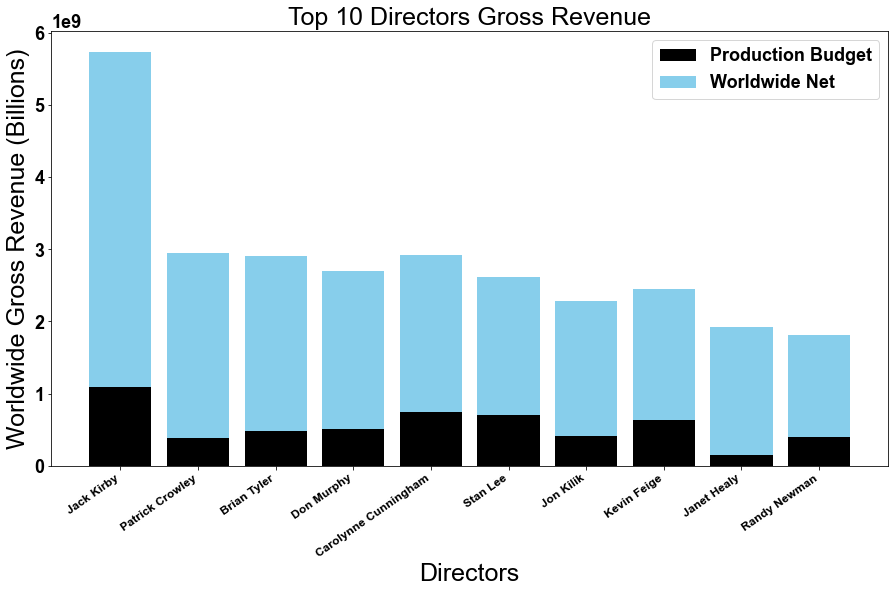

In [148]:
plt.figure(figsize=(15,8))

director = budget_director_df1.index
budget_gross = budget_director_df1.production_budget
ww_net = budget_director_df1.worldwide_net
ww_gross = budget_director_df1.worldwide_gross

plt.bar(range(len(director)), budget_gross, color='black')
plt.bar(range(len(director)), ww_net, color='skyblue', bottom=budget_gross)
plt.title('Top 10 Directors Gross Revenue', fontsize=25)
plt.xlabel('Directors', fontsize=25)
plt.ylabel('Worldwide Gross Revenue (Billions)', fontsize=25)
plt.xticks(range(len(director)), director, rotation=35, horizontalalignment='right', fontsize=12)

plt.legend(['Production Budget', 'Worldwide Net'])
plt.show();

In [149]:
budget_director_df2 = budget_director_df1.reset_index()

In [150]:
budget_director_df2.head()

,primary_name,production_budget,worldwide_gross,worldwide_net
0,Jack Kirby,1090000000,5739154163,4649154163
1,Patrick Crowley,385000000,2954627663,2569627663
2,Brian Tyler,480000000,2908580226,2428580226
3,Don Murphy,507000000,2693025208,2186025208
4,Carolynne Cunningham,750000000,2922948044,2172948044


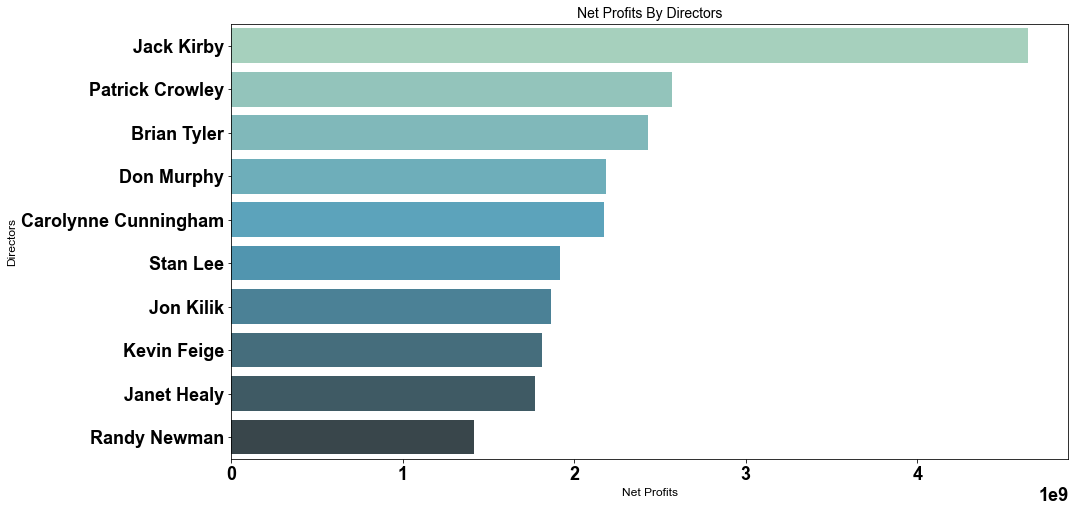

In [151]:
#Plot the above findings.
plt.figure(figsize=(15,8))
ax40 = sns.barplot(x=budget_director_df2['worldwide_net'], y=budget_director_df2['primary_name'], palette='GnBu_d')
plt.xlabel('Net Profits', fontsize=12)
plt.ylabel('Directors', fontsize=12)
plt.title('Net Profits By Directors', fontsize=14)
plt.savefig('fig06_NetDirector');

##### Question 4 Conclusions:

Question #4: Which directors tend to add the most value? 
Recommendation #4: The top 10 directors that made the most profitable movies are listed. We recommend hiring a director from the list below. 

We recommend creating a movie hiring one of the top 10 most profitable directors

## Data Modeling

Each data frame has their own relevant data and in order to minimize the amount of deleted data, I found the data frames that were required and only removed missing or irrelevant data. I then created the final joint data frame by combining all of the data frames together. This assisted in the visualization and understanding of the film industry but also reduced the data to 1200 movies. 


## Conclusions
While there are many other factors that contribute to the success of a movie, based on this analysis the following recommendations will result in a successful business venture for Microsoft’s new movie studio.
1.	Recommend that Microsoft should budget the production around $182,000,000.00
2.	Buena Vista and Universal have been dominating the box office recently. Recommend to consider these studios as competitors and analyze their work to find out what is a competitive advantage Microsoft can have.
3.	Recommend that Microsoft focus on the top 3 profitable movie genres which are Action, Adventure and Comedy.
4.	Recommend that Microsoft hires Jack Kirby or one of the top 10 profitable directors. 

Further Analysis – For future analysis, I would like to investigate the relationship of highly rated movies and the net profit revenues.